 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [79]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [80]:
# Reading whale returns
whale_path = Path("whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [81]:
# Count nulls
whale_data.isnull().sum()
whale_data = whale_data.sort_values("Date", ascending=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [82]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [83]:
# Reading algorithmic returns
algo_path = Path("algo_returns.csv")

algo_data = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [84]:
# Count nulls
algo_data.isnull().sum()
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [85]:
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data = algo_data.sort_values("Date", ascending=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [86]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("sp_tsx_history.csv")

sp_tsx_history_data = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [87]:
# Check Data Types
sp_tsx_history_data.dtypes

# Fix Data Types
sp_tsx_history_data["Close"] = sp_tsx_history_data["Close"].str.replace("$", "")
sp_tsx_history_data["Close"] = sp_tsx_history_data["Close"].str.replace(",", "")

# Drop nulls
sp_tsx_history_data = sp_tsx_history_data.dropna().copy()

# Fix Data Types to Float
sp_tsx_history_data["Close"] = sp_tsx_history_data["Close"].astype("float")

# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_data = sp_tsx_history_data.rename(columns={"Close": "S&P TSX60"})

sp_tsx_history_data.head()

<ipython-input-87-95a38f409cbb>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_data["Close"] = sp_tsx_history_data["Close"].str.replace("$", "")


,S&P TSX60
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [88]:
# Calculate Daily Returns
sp_tsx_history_returns = sp_tsx_history_data.pct_change().copy()
sp_tsx_history_returns.head()

,S&P TSX60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [90]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolio_returns = pd.concat([whale_data, algo_data, sp_tsx_history_returns], axis='columns', join='inner')
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Returns'}, xlabel='Date'>

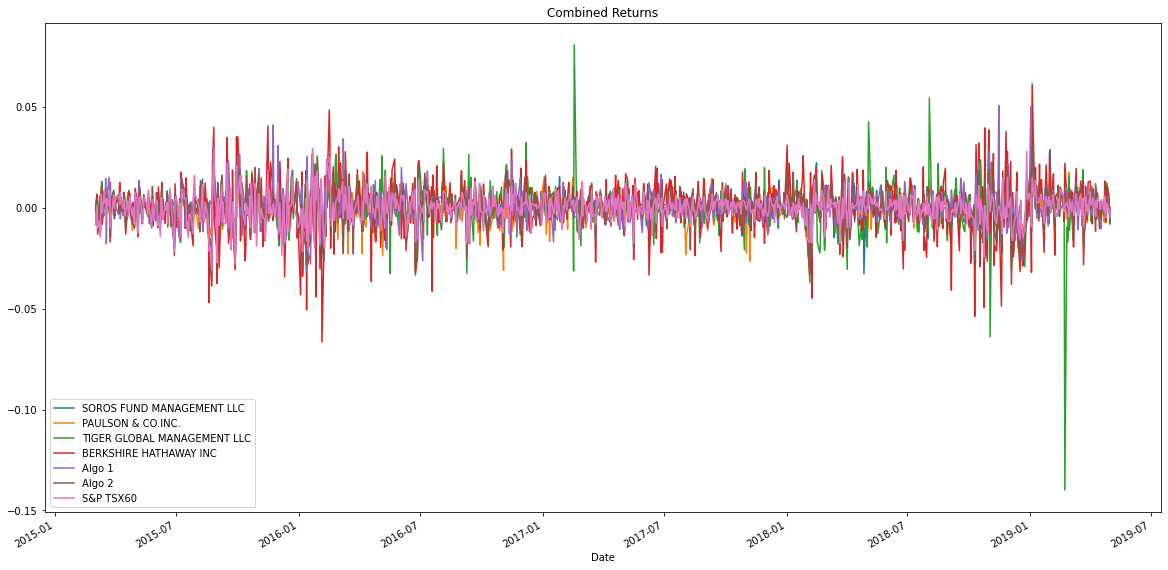

In [91]:
# Plot daily returns of all portfolios
all_portfolio_returns.plot(title="Combined Returns", figsize=(20, 10))

#### Calculate and Plot cumulative returns.

In [92]:
# Calculate cumulative returns of all portfolios
cumulative_portfolio_returns = (1+all_portfolio_returns).cumprod()
cumulative_portfolio_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071
2019-04-30,1.127228,0.762119,0.855749,1.365054,2.021675,1.204187,1.070803
2019-05-01,1.120637,0.761096,0.848958,1.354361,2.021865,1.195327,1.065767


<AxesSubplot:title={'center':'Combined Returns'}, xlabel='Date'>

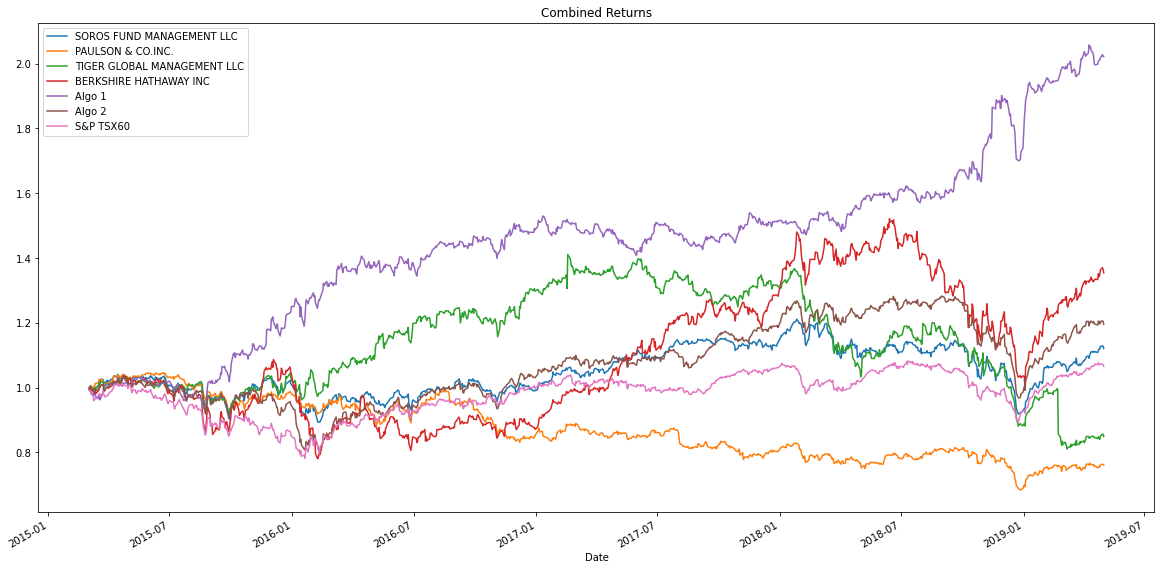

In [93]:
# Plot cumulative returns
cumulative_portfolio_returns.plot(title="Combined Returns", figsize=(20, 10))

## Portfolio Evaluations
# The S&P TSX60 Index Fund is outperformed by the Soros Fund, Algo2, Berkshire Hathaway, and the Algo2 Fund over the 5years between March 2015 to May 2019.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

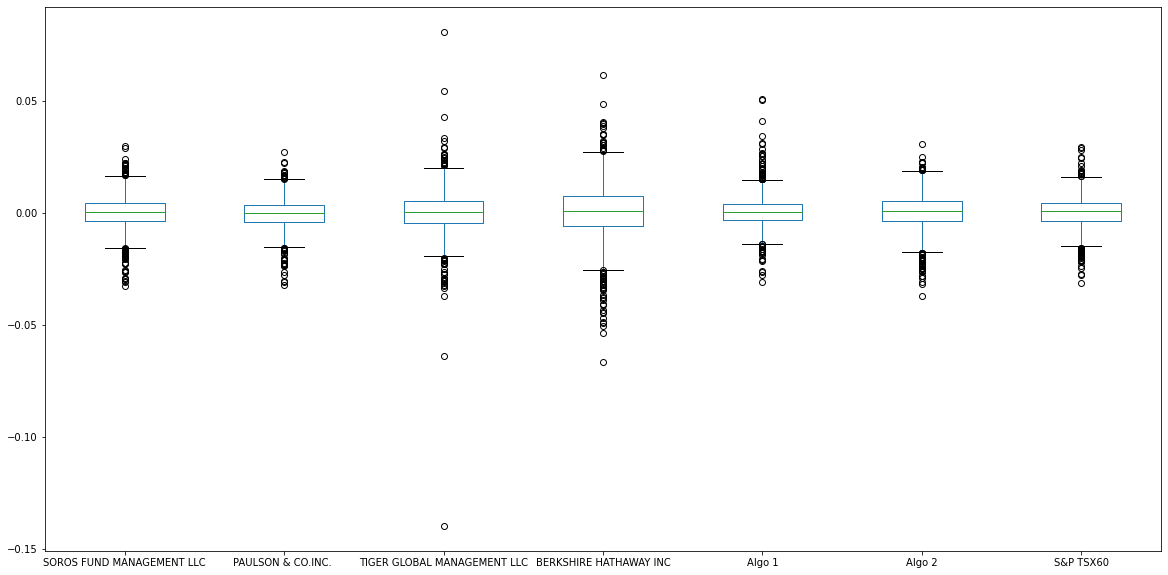

In [94]:
# Box plot to visually show risk
all_portfolio_returns.plot.box(figsize=(20, 10))

### Calculate Standard Deviations

In [95]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_returns_std = all_portfolio_returns.std()
all_portfolio_returns_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [96]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_history_returns_std = sp_tsx_history_returns.std()
sp_tsx_history_returns_std

S&P TSX60    0.006637
dtype: float64

In [97]:
# Determine which portfolios are riskier than the S&P TSX 60
sp_tsx60_risk = all_portfolio_returns["S&P TSX60"].std()
all_portfolio_returns.std()>sp_tsx60_risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX60                      False
dtype: bool

# All portfolios are riskier then the S&P TSX60 except Paulson & Co. Inc.

### Calculate the Annualized Standard Deviation

In [98]:
# Calculate the annualized standard deviation (252 trading days)
all_portfolio_annualized_std = all_portfolio_returns_std * np.sqrt(252)
all_portfolio_annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX60                      0.111664
dtype: float64

---

# All portfolio's are riskier (i.e. higher volatility) compared to the S&P TSX60 except for Paulson & Co. Inc.

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [99]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_returns.rolling(window=21).std()
all_portfolio_returns.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655


<AxesSubplot:title={'center':"All Portfolio's 21-Day Rolling Standard Deviation"}, xlabel='Date'>

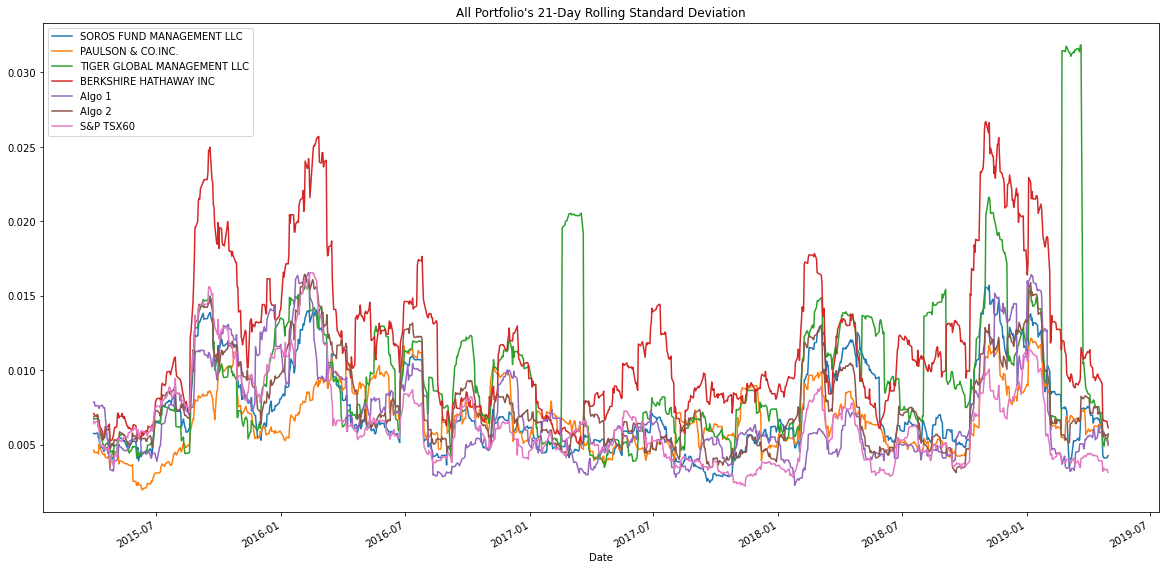

In [100]:
# Plot the rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(title="All Portfolio's 21-Day Rolling Standard Deviation", figsize=(20, 10))

### Calculate and plot the correlation

In [101]:
# Calculate the correlation
all_portfolio_corr = all_portfolio_returns.corr()

# Display the correlation matrix
all_portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

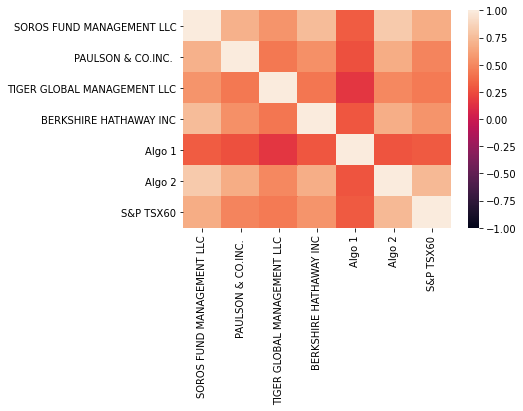

In [102]:
#Show Correlation as heatmap
sns.heatmap(all_portfolio_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [103]:
# Calculate covariance of a single portfolio
covariance_algo1 = all_portfolio_returns["Algo 1"].cov(all_portfolio_returns["S&P TSX60"])
covariance_algo1

1.6563000308911378e-05

In [104]:
# Calculate variance of S&P TSX
variance_SP60 = all_portfolio_returns["S&P TSX60"].var()
variance_SP60

4.9479515915131015e-05

In [105]:
# Computing beta
beta_algo1 = covariance_algo1 / variance_SP60
beta_algo1

0.33474459081856844

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 vs. S&P TSX60'}, xlabel='Date'>

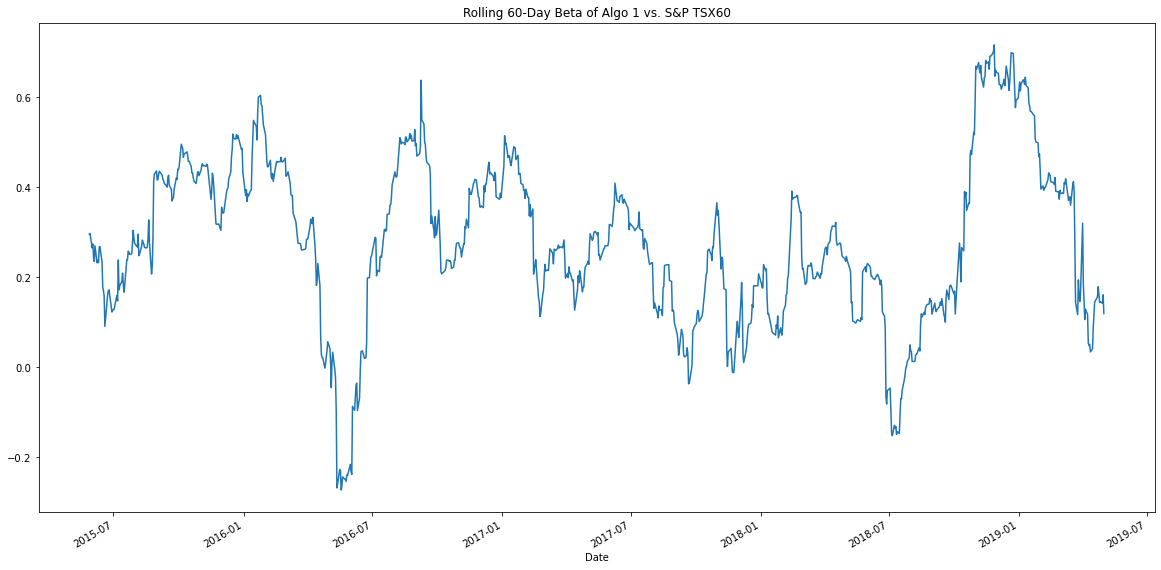

In [106]:
# Plot beta trend
rolling_covariance = all_portfolio_returns["Algo 1"].rolling(window=60).cov(all_portfolio_returns["S&P TSX60"])
rolling_variance = all_portfolio_returns["S&P TSX60"].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 vs. S&P TSX60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weight Average 21 Half-life across all Portfolios'}, xlabel='Date'>

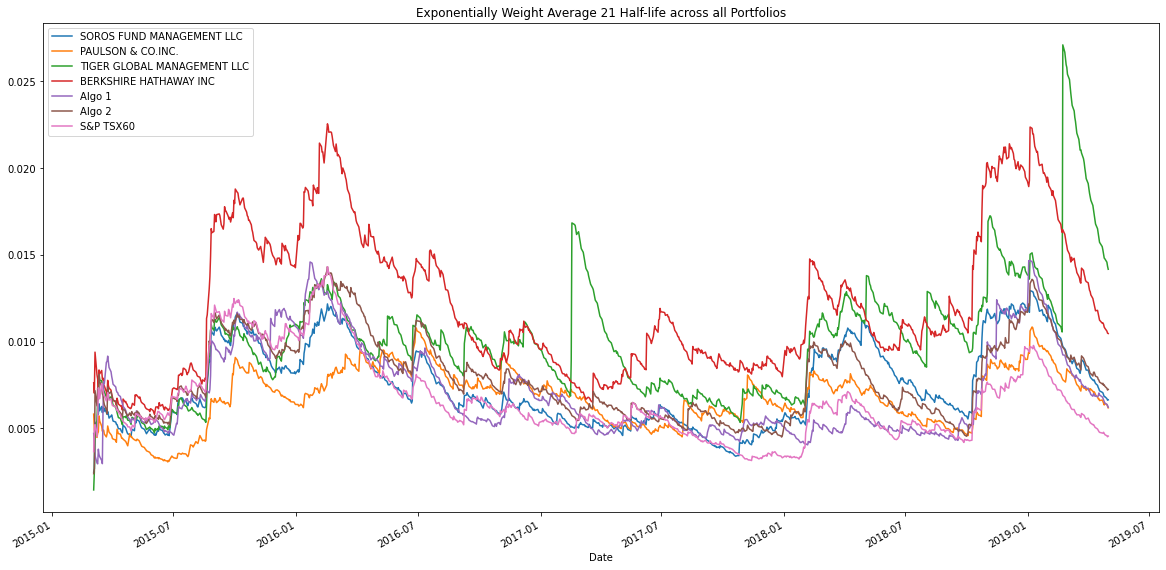

In [107]:
# Use `ewm` to calculate the rolling window
all_portfolio_returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weight Average 21 Half-life across all Portfolios")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [108]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_portfolio_returns.mean()) * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX60                      0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

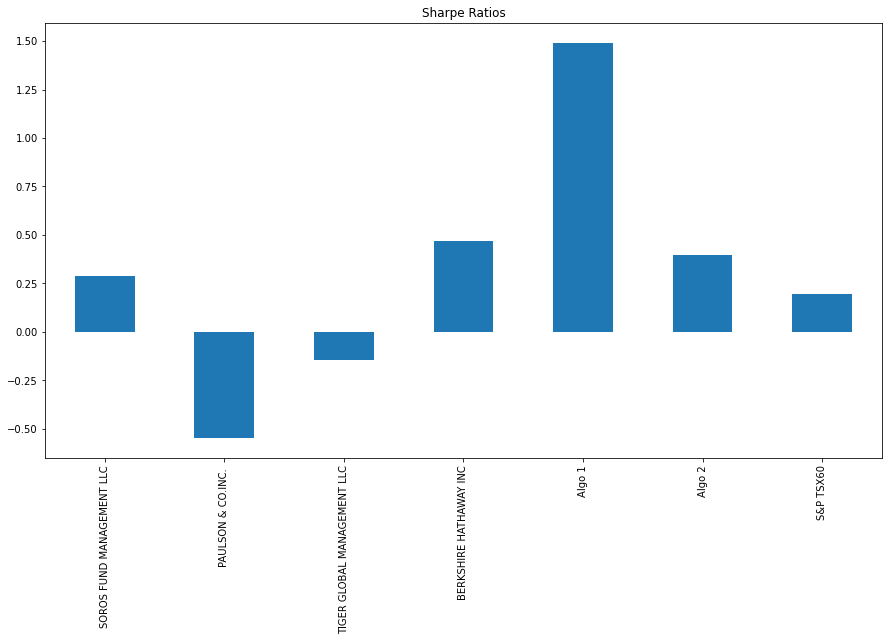

In [109]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(15,8),title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

# Yes, the Algorithmic strategies outperformed the S&P TSX60.  The Algo1 portfolio was be far the best performing portfolio.  The Algo2 performance was comparable, but slightly less then Berkshire Hathaway and Soros Fund.  Both Paulson and Tiger Global were far worse performing.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [110]:
# Reading data from 1st stock
shop_path = Path("shop_historical.csv")

shop_data = pd.read_csv(shop_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [111]:
# Reading data from 2nd stock
l_historical_path = Path("l_historical.csv")

l_historical_data = pd.read_csv(l_historical_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [112]:
# Reading data from 3rd stock
otex_path = Path("otex_historical.csv")

otex_data = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [113]:
# Combine all stocks in a single DataFrame
all_stock_returns = pd.concat([shop_data, l_historical_data, otex_data], axis='columns', join='inner')
all_stock_returns.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [114]:
# Reorganize portfolio data by having a column per symbol
all_stock_returns = all_stock_returns.drop(columns=["Symbol"])
all_stock_returns.head()

#all_prices = pd.concat([enb, imo], axis="rows", join="inner")
#all_prices = all_prices.reset_index()
#all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
#all_prices.head()

,Close,Close,Close
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [115]:
columns = ["SHOP", "Loblaws", "OTEX"]
all_stock_returns.columns = columns
all_stock_returns.head()

,SHOP,Loblaws,OTEX
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [116]:
# Calculate daily returns
all_stock_returns = all_stock_returns.pct_change().copy()

#Drop NAs
all_stock_returns = all_stock_returns.dropna().copy()

# Display sample data
all_stock_returns.head()

,SHOP,Loblaws,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [117]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_stock_returns = all_stock_returns.dot(weights)

# Display sample data
portfolio_stock_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [118]:
# Join your returns DataFrame to the original returns DataFrame
joined_port_returns = pd.concat([portfolio_stock_returns, all_portfolio_returns], axis='columns', join='inner')
joined_port_returns

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [119]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_port_returns = joined_port_returns.dropna().copy()
joined_port_returns.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [120]:
# Calculate the annualized `std`
joined_port_returns_std = joined_port_returns.std()
joined_port_returns_ann_std = joined_port_returns_std * np.sqrt(252)
joined_port_returns_ann_std

0                              0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX60                      0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [121]:
# Calculate rolling standard deviation
joined_port_returns_std = joined_port_returns.rolling(window=21).std()
joined_port_returns_std

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX60
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.008253,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.008231,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.007718,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'Joined Portfolio 21-Day Rolling Standard Deviation'}, xlabel='Date'>

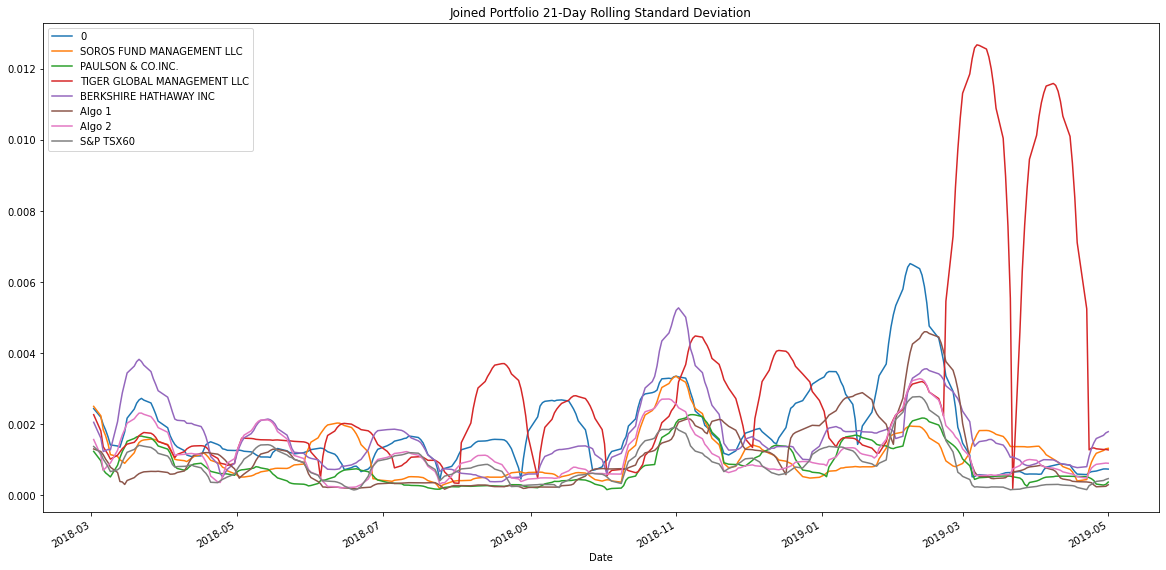

In [122]:
# Plot rolling standard deviation
joined_port_returns_std.rolling(window=21).std().plot(title="Joined Portfolio 21-Day Rolling Standard Deviation", figsize=(20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

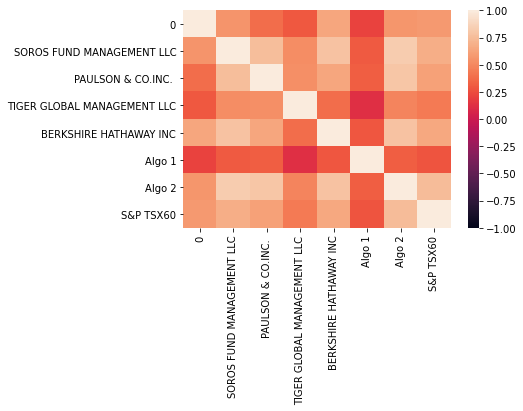

In [123]:
# Calculate and plot the correlation
joined_port_returns_corr = joined_port_returns.corr()
sns.heatmap(joined_port_returns_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [125]:
# Calculate and plot Beta

# Calculate covariance of my portfolio
covariance_my_port = portfolio_stock_returns["0"].cov(all_portfolio_returns["S&P TSX60"])
covariance_my_port


KeyError: '0'

In [126]:

# Calculate variance of S&P TSX
variance_SP60 = all_portfolio_returns["S&P TSX60"].var()
variance_SP60

beta_my_port = covariance_my_port / variance_SP60
beta_my_port

# Plot beta trend
rolling_covariance = all_portfolio_returns["Algo 1"].rolling(window=60).cov(all_portfolio_returns["S&P TSX60"])
rolling_variance = all_portfolio_returns["S&P TSX60"].rolling(window=60).var()

rolling_beta_my_port = rolling_my_port_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 vs. S&P TSX60')

#joined_port_returns_var = all_portfolio_returns.cov() / 

#all_portfolio_returns.plot.box(figsize=(20, 10))

NameError: name 'covariance_my_port' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [127]:
# Calculate Annualizied Sharpe Ratios
#sharpe_ratios = ((all_portfolio_returns.mean()) * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios = ((joined_port_returns.mean()) * 252) / (joined_port_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

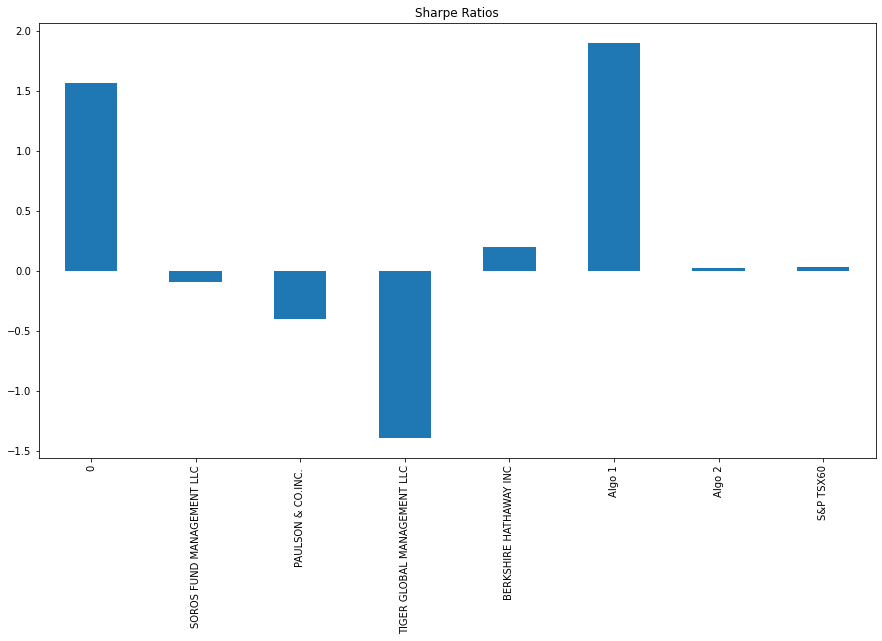

In [128]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(15,8),title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!